In [2]:
import theano as th
#Python library for fast numerical computation that can be run on the CPU or GPU.

In [3]:
import pymc3 as pm

In [4]:
import arviz as az #package for exploratory analysis of Bayesian models it offers data structures for manipulating data common in Bayesian analysis
import matplotlib.pyplot as plt
import numpy as np

In [5]:
plt.style.use('seaborn-darkgrid') #grid style

In [6]:
import pandas as pd #package providing fast, flexible, and expressive data structures

In [7]:
disaster_data = pd.Series([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                           3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                           2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3, 0, 0, #np.nan: missing data for that year
                           1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                           0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                           3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                           0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])
years = np.arange(1851, 1962)
#defense_data = pd.Series([202,311,311,297,195,221,91,161,362,236,291,316,177,115,56,384])
#defense_data_rush = pd.Series([52,99,167,86,139,245,100,188,57,217,76,86,47,140,145,70])
#week = np.array([1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17])

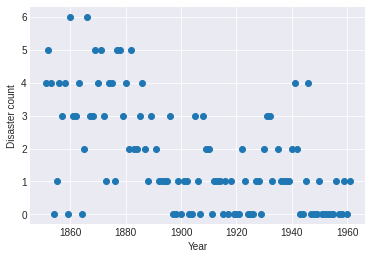

In [8]:
plt.plot(years, disaster_data, 'o', markersize=6);
plt.ylabel("Disaster count")
plt.xlabel("Year");

In [9]:
with pm.Model() as disaster_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper=years.max(), testval=1900)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)
    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

/home/jupyter-marta/.local/lib/python3.7/site-packages/pymc3/model.py:1755: ImputationWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [10]:
with disaster_model:
    trace = pm.sample(10000)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 9 seconds.
The number of effective samples is smaller than 10% for some parameters.


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/jupyter-marta/.local/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or

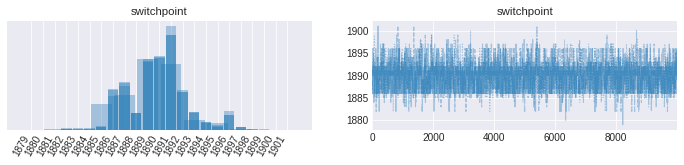

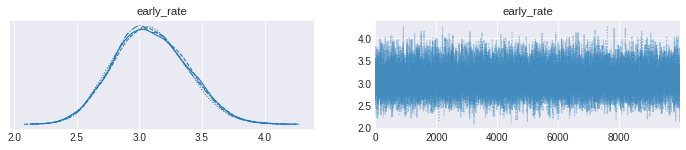

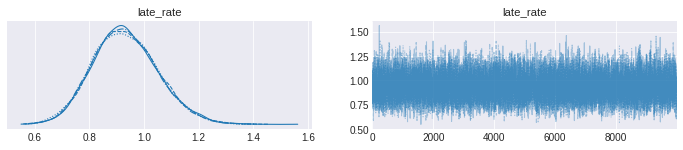

In [14]:
axes_arr = pm.traceplot(trace, var_names="switchpoint")
plt.draw() # this forces population of the xticklabels so that the get_text() works later.
for ax in axes_arr.flatten():
    if ax.get_title() == 'switchpoint': # find the right axes
        labels = [label.get_text() for label in ax.get_xticklabels()] # collect the existing labels.
        ax.set_xticklabels(labels, rotation=60, ha='right') # rotation here
        break
plt.draw()

pm.traceplot(trace, var_names="early_rate");
pm.traceplot(trace, var_names="late_rate");

In [12]:
pm.summary(trace).round(2) #round(2): 2 decimals

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\marta\anaconda3\envs\pm3env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
switchpoint,1889.83,2.45,1886.00,1894.00,0.05,0.04,2292.0,3715.0,1.0
disasters_missing[0],2.19,1.85,0.00,5.00,0.05,0.03,1574.0,2193.0,1.0
disasters_missing[1],0.94,0.97,0.00,3.00,0.02,0.01,4235.0,5282.0,1.0
early_rate,3.09,0.29,2.56,3.64,0.00,0.00,20433.0,24606.0,1.0
late_rate,0.93,0.12,0.72,1.15,0.00,0.00,21305.0,24041.0,1.0


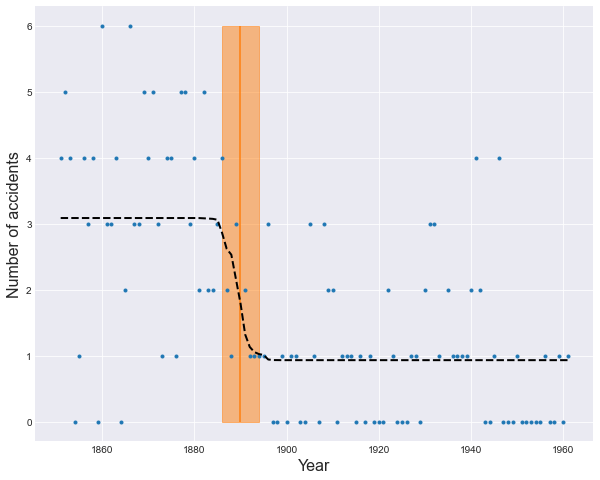

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(years, disaster_data, '.')
plt.ylabel("Number of accidents", fontsize=16)
plt.xlabel("Year", fontsize=16)

plt.vlines(trace['switchpoint'].mean(), disaster_data.min(), disaster_data.max(), color='C1')
average_disasters = np.zeros_like(disaster_data, dtype='float')
for i, year in enumerate(years):
    idx = year < trace['switchpoint']
    average_disasters[i] = (trace['early_rate'][idx].sum() + trace['late_rate'][~idx].sum()) / (len(trace) * trace.nchains)
sp_hdi = pm.hdi(trace['switchpoint'])
plt.fill_betweenx(y=[disaster_data.min(), disaster_data.max()],
                  x1=sp_hdi[0], x2=sp_hdi[1], alpha=0.5, color='C1');
plt.plot(years, average_disasters,  'k--', lw=2);